# The Relationship Between GDP and Life Expectancy

## Overview
This project explores the interplay between economic growth (measured by GDP) and life expectancy at birth across six diverse countries - Chile, China, Germany, Mexico, the United States of America and Zimbabwe - from 2000 to 2015. Using data from the World Health Organization (WHO) and the World Bank, I investigate trends and correlations to uncover patterns that highlight how economic development may influence longevity.

**Skills Demonstrated:**
- Exploratory data analysis (EDA) and data cleaning with Pandas
- Feature engineering (e.g., log transformations for skewed data)
- Group-by aggregations and comparative analysis
- Statistical hypothesis testing (e.g., Pearson correlation with p-values)
- Data visualization with Matplotlib and Seaborn (line plots, scatter plots, box plots, bar charts)

**Tools Used:** Python (Pandas, NumPy, Matplotlib, Seaborn, SciPy), EDA

**Dataset:** Sourced from WHO and World Bank; includes annual GDP (in USD) and life expectancy (in years) for the six countries (96 observations total). No missing values; data cleaned and prepared for analysis.

## Importing Libraries and Loading the Data

In this step, I import the required Python libraries and load the dataset we will be using. I also perform an initial inspection to understand its structure, check for missing values and view basic statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
all_data = pd.read_csv('all_data.csv')

# Quick glance over the data
display(all_data.head())
display(all_data.info())
display(all_data.describe())

# Renaming life expectancy column for easier handling
all_data = all_data.rename(columns={
    'Life expectancy at birth (years)': 'Life_Expectancy'
})

# Adding log-transformed GDP to handle skewness in values
all_data['log_GDP'] = np.log(all_data['GDP'])

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


None

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Exploring and Explaining the Data
In this section i will explore the data to find correlations between the life expectancy at birth and the GDP by creating visualisations using Pythons Seaborn and Matplotlib libraries. This will be presented by asking specific questions related to the data and providing visusalisations to deduce an answer.

### 1. Has life expectancy increased over time in each of the six nations?

,min,max,increase
Country,,,
Chile,77.3,80.5,3.2
China,71.7,76.1,4.4
Germany,78.0,81.0,3.0
Mexico,74.8,76.7,1.9
United States of America,76.8,79.3,2.5
Zimbabwe,44.3,60.7,16.4


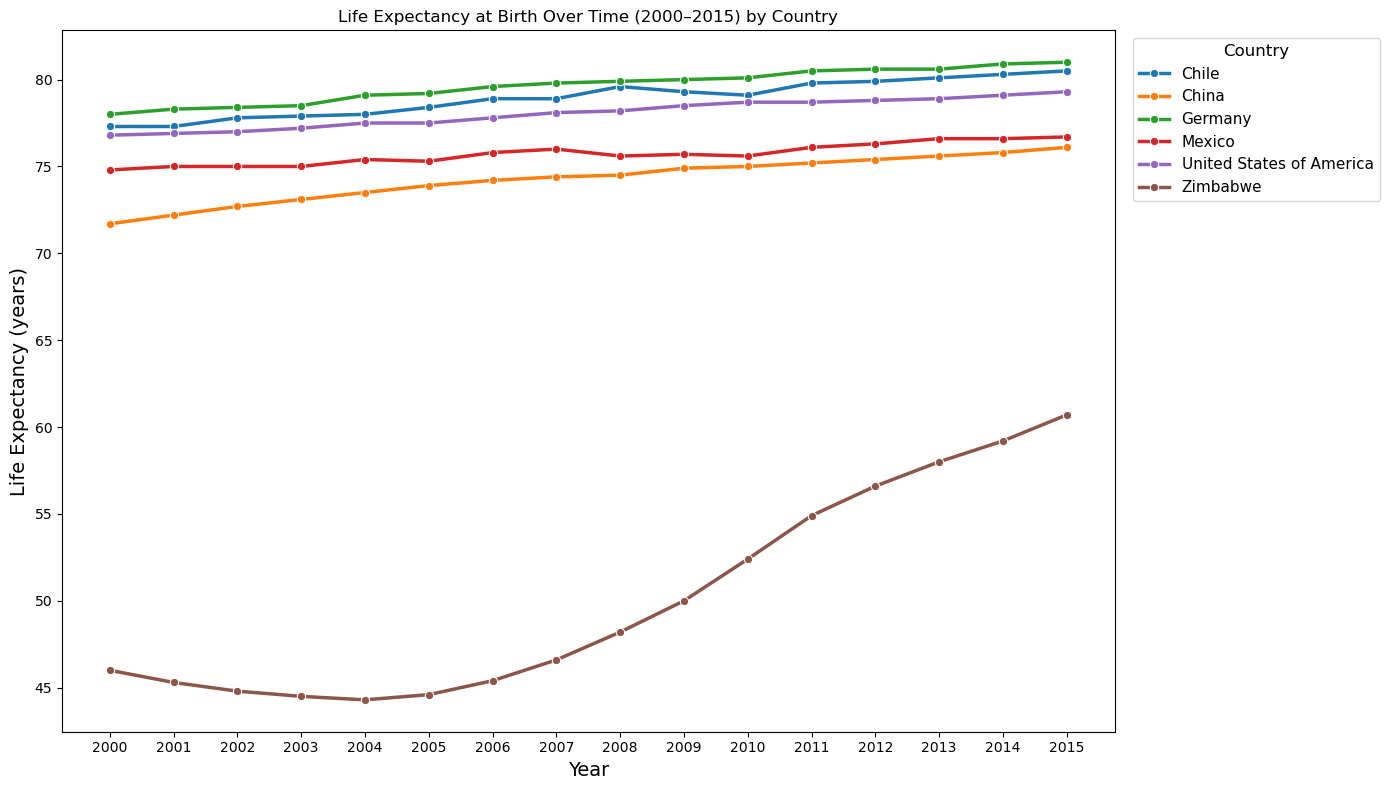

In [2]:
# Creating a line graph illustrating each countries life expectancy by year
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=all_data,
    x="Year",
    y="Life_Expectancy",
    hue="Country",
    marker="o",      
    linewidth=2.5
)

# Customising the plot
plt.title("Life Expectancy at Birth Over Time (2000–2015) by Country")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Life Expectancy (years)", fontsize=14)
plt.legend(title="Country", title_fontsize=12, fontsize=11, bbox_to_anchor=(1.01, 1), loc="upper left")
plt.xticks(all_data["Year"].unique()) 
plt.tight_layout()

# Viewing the lowest and highest values of life expectancy for each country
le_change = all_data.groupby('Country')['Life_Expectancy'].agg(['min', 'max'])
le_change['increase'] = le_change['max'] - le_change['min']
display(le_change)

All six countries showed increases in life expectancy from 2000 to 2015. Here is the difference between the lowest and highest life expectancies at birth observed:
- Mexico: +1.9 years, the lowest out of the six countries
- United States of America: +2.5 years
- Germany: +3.0 years
- Chile: +3.2 years
- China: +4.4 years
- Zimbabwe +16.4 years (significantly higher than the rest of the countries in the dataset, this will be investigated further)

### 2. Has GDP increased over time in the six nations?

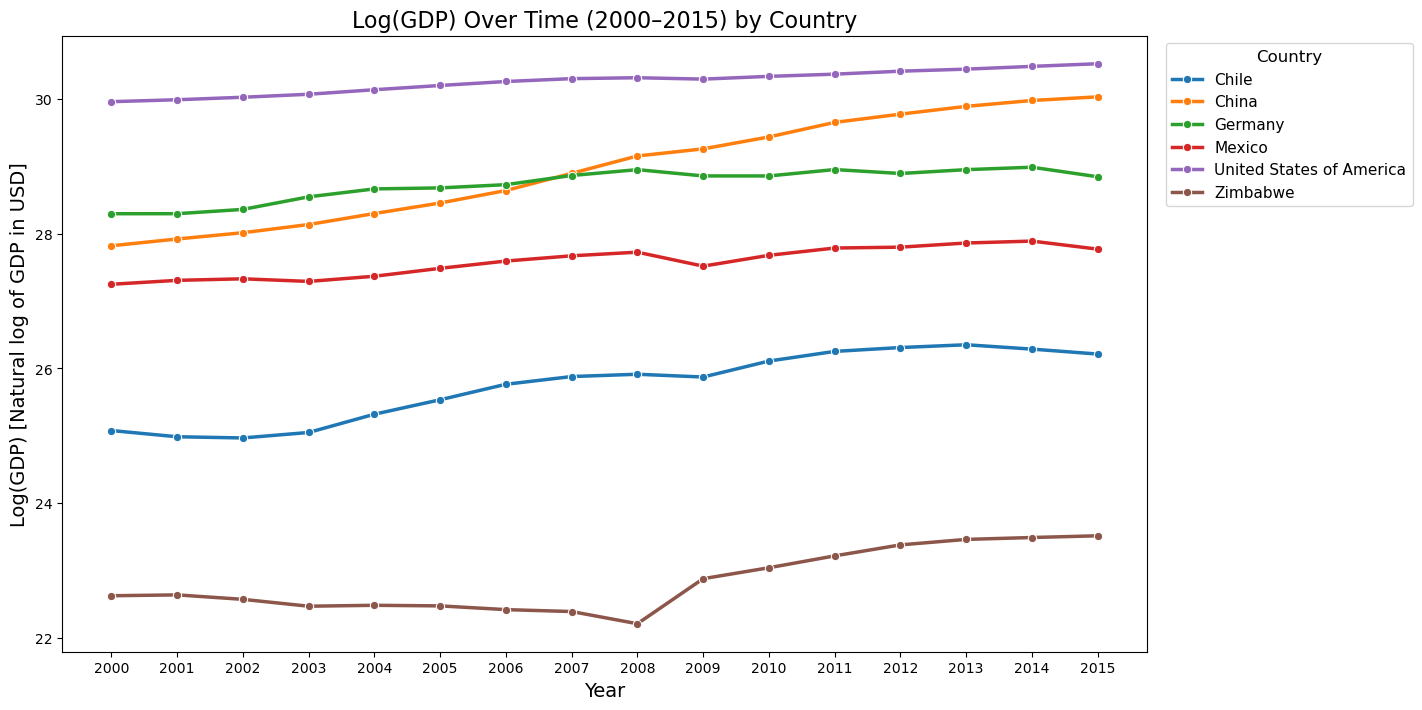

Year                     GDP 2000 GDP 2015   Increase  Multiple
Country                                                        
Chile                        $78B    $243B  +$164.66B       3.1
China                      $1.21T  $11.06T    +$9.85T       9.1
Germany                    $1.95T   $3.38T    +$1.43T       1.7
Mexico                      $684B   $1.15T  +$468.61B       1.7
United States of America  $10.30T  $18.10T    +$7.80T       1.8
Zimbabwe                      $7B     $16B    +$9.61B       2.4


In [3]:
# Creating a line graph plotting each countries GDP by year
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=all_data,
    x="Year",
    y="log_GDP",
    hue="Country",
    marker="o",
    linewidth=2.5
)

# Customising the plot
plt.title("Log(GDP) Over Time (2000–2015) by Country", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Log(GDP) [Natural log of GDP in USD]", fontsize=14)
plt.legend(title="Country", title_fontsize=12, fontsize=11, bbox_to_anchor=(1.01, 1), loc="upper left")
plt.xticks(all_data["Year"].unique())  
plt.show()

# Quick code to print the table (for notebook)
gdp_compare = all_data[all_data['Year'].isin([2000, 2015])][['Country', 'Year', 'GDP']]
gdp_pivot = gdp_compare.pivot(index='Country', columns='Year', values='GDP')
gdp_pivot['Increase'] = gdp_pivot[2015] - gdp_pivot[2000]
gdp_pivot['Multiple'] = (gdp_pivot[2015] / gdp_pivot[2000]).round(1)

# Format based on GDP size (trillion or billion)
gdp_pivot['GDP 2000'] = gdp_pivot[2000].apply(lambda x: f"${x/1e12:.2f}T" if x >= 1e12 else f"${x/1e9:.0f}B")
gdp_pivot['GDP 2015'] = gdp_pivot[2015].apply(lambda x: f"${x/1e12:.2f}T" if x >= 1e12 else f"${x/1e9:.0f}B")
gdp_pivot['Increase'] = gdp_pivot['Increase'].apply(lambda x: f"+${x/1e12:.2f}T" if x >= 1e12 else f"+${x/1e9:.2f}B")
print(gdp_pivot[['GDP 2000', 'GDP 2015', 'Increase', 'Multiple']])

All six countries experienced net GDP growth from 2000 to 2015**, though the magnitude, speed, and stability varied significantly.

- China showed the most explosive growth (roughly 9.1× increase in real GDP value), rising from around 1.2 trillion USD in 2000 to 11.1 trillion USD in 2015 — the clearest example of rapid economic transformation.
- Chile grew strongly (roughly 3.1×), benefiting from commodity booms and stable policies.
- Zimbabwe had a turbulent path: severe contraction in the early 2000s (GDP fell to around $4.4 billion by 2008), followed by strong recovery (~2.4× overall from 2000).
- Germany, Mexico, and the United States saw more moderate growth (roughly 1.7–1.8×), with noticeable temporary dips during the 2008–2009 global financial crisis.


## 3. How does the average Life Expectancy differ between each country?

In [4]:
# Calculating the overall average
overall_avg = all_data['Life_Expectancy'].mean()
print(f"Overall average life expectancy: {overall_avg:.2f} years")

# Average by country
country_averages = all_data.groupby('Country')['Life_Expectancy'].mean().sort_values(ascending=False)
print("\nAverage life expectancy by country:")
print(country_averages.round(2))

Overall average life expectancy: 72.79 years

Average life expectancy by country:
Country
Germany                     79.66
Chile                       78.94
United States of America    78.06
Mexico                      75.72
China                       74.26
Zimbabwe                    50.09
Name: Life_Expectancy, dtype: float64


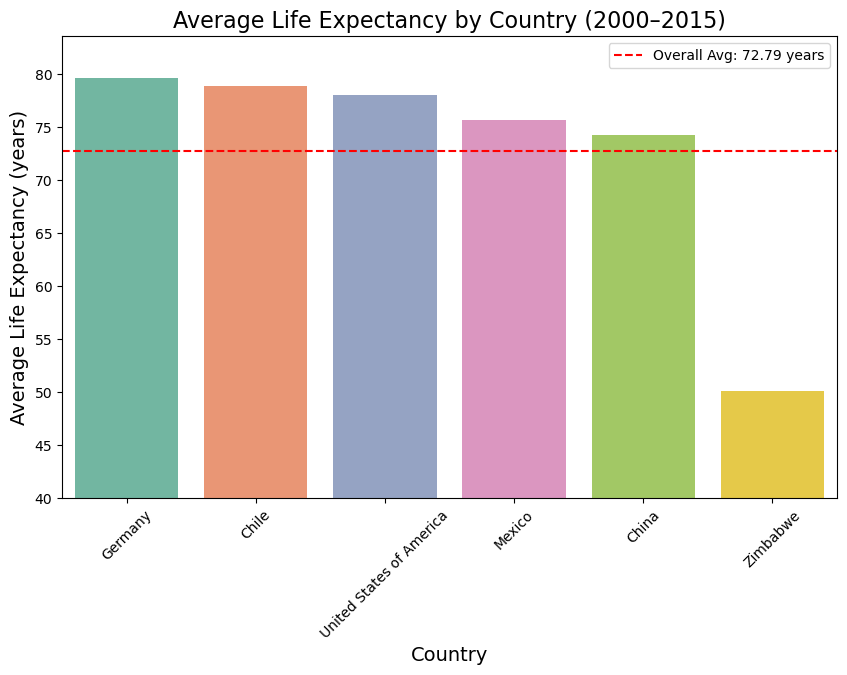

In [5]:
# Creating a bar plot of each countries average life expectancy compared to the overall average
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_averages.index,
    y=country_averages.values,
    palette="Set2", hue=country_averages.index
)

# Add horizontal line for overall average
plt.axhline(y=overall_avg, color='red', linestyle='--', label='Overall Avg: 72.79 years')

# Customising the plot
plt.title("Average Life Expectancy by Country (2000–2015)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Life Expectancy (years)", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(40, None)
plt.legend(loc=0)
plt.show()

Across the 2000–2015 period, the overall average life expectancy was 72.8 years.

**Insight**: High-income/developed nations (Germany, Chile, USA) cluster tightly around 78–80 years, reflecting strong baseline healthcare and living standards. Emerging economies (Mexico, China) sit in the mid-70s, while Zimbabwe stands out as a significant outlier at just 50.1 years — largely due to the HIV/AIDS crisis, economic collapse, and health system breakdown in the early 2000s.

## 4. What is the overall distribution of Life Expectancy and distribution per country?

In [6]:
# Overall distribution stats
overall_desc = all_data['Life_Expectancy'].describe()
print("Overall life expectancy distribution stats:")
display(overall_desc)

# Per-country distribution stats (e.g., mean, std, min, max)
country_desc = all_data.groupby('Country')['Life_Expectancy'].describe()
print("\nPer-country life expectancy distribution stats:")
display(country_desc[['mean', 'std', 'min', 'max']].round(1))

Overall life expectancy distribution stats:


count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life_Expectancy, dtype: float64


Per-country life expectancy distribution stats:


,mean,std,min,max
Country,,,,
Chile,78.9,1.1,77.3,80.5
China,74.3,1.3,71.7,76.1
Germany,79.7,1.0,78.0,81.0
Mexico,75.7,0.6,74.8,76.7
United States of America,78.1,0.8,76.8,79.3
Zimbabwe,50.1,5.9,44.3,60.7


- Most countries show low year-to-year variability (standard deviation < 1.5 years) and steady upward trends.
- Zimbabwe is the clear exception: high volatility (std = 5.9 years) and the largest improvement (+16.4 years), reflecting recovery from a severe health and economic crisis.

## 5. Is there a Correlation Between GDP and Life Expectancy?
### Null Hypothesis: There is no correlation between GDP and Life Expectancy through the countries in our dataset.

In [7]:
# Overall correlations
corr_raw_gdp, p_raw = pearsonr(all_data['GDP'], all_data['Life_Expectancy'])
corr_log_gdp, p_log = pearsonr(all_data['log_GDP'], all_data['Life_Expectancy'])
print(f"Overall Pearson correlation (raw GDP): {corr_raw_gdp:.2f} (p-value: {p_raw:.4f})")
print(f"Overall Pearson correlation (log GDP): {corr_log_gdp:.2f} (p-value: {p_log:.4f})")

# Per-country correlations
per_country_corrs = {}
for country in all_data['Country'].unique():
    country_data = all_data[all_data['Country'] == country]
    corr, p = pearsonr(country_data['GDP'], country_data['Life_Expectancy'])
    per_country_corrs[country] = (corr, p)

print("\nPer-country Pearson correlations (GDP vs. Life Expectancy):")
for country, (corr, p) in per_country_corrs.items():
    print(f"{country}: {corr:.2f} (p-value: {p:.15f})")

Overall Pearson correlation (raw GDP): 0.34 (p-value: 0.0006)
Overall Pearson correlation (log GDP): 0.79 (p-value: 0.0000)

Per-country Pearson correlations (GDP vs. Life Expectancy):
Chile: 0.95 (p-value: 0.000000018659140)
China: 0.91 (p-value: 0.000001125098572)
Germany: 0.93 (p-value: 0.000000140188155)
Mexico: 0.93 (p-value: 0.000000146869602)
United States of America: 0.98 (p-value: 0.000000000017500)
Zimbabwe: 0.97 (p-value: 0.000000001235852)


### Correlation Analysis: GDP and Life Expectancy

**Overall (pooled data)**  
- Raw GDP: r = 0.34 (moderate positive, p = 0.0006)  
- Log(GDP): r = 0.79 (**strong** positive, p ≈ 0) → much clearer linear pattern after log transform due to diminishing returns at high income.

**Within each country (2000–2015)**  
All show very strong to near-perfect positive correlations (r = 0.91–0.98, all p < 10⁻⁶), meaning national GDP growth has closely tracked life expectancy gains.

**Hypothesis testing summary**  
We reject the null hypothesis (no correlation) in every case at any conventional significance level. The relationships are statistically robust.

This supports the broad pattern seen in global data (Preston curve): economic development strongly associates with better health outcomes, especially in the earlier stages of growth.